## Lesson 03: Exploratory Analysis 

Pandas DataFrame Operations
Visualization


, and [Seaborn](https://seaborn.pydata.org/)
https://jakevdp.github.io/PythonDataScienceHandbook/
https://www.fueleconomy.gov/feg/download.shtml
https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle

https://www.kaggle.com/dmi3kno/newcarsalesnorway



In [13]:
!pip install seaborn

  Using cached tabulate-0.8.2.tar.gz
  Running setup.py bdist_wheel for tabulate ... done
  Stored in directory: /Users/arthur/Library/Caches/pip/wheels/7c/fc/c4/f89c90e8bb6a0052a4ad4a9bc30a61429fea5d3439c63e2efd
Successfully built tabulate


In [43]:
# a warning about building font cache can be ignored
import pandas as pd
import seaborn as sns

In [3]:
epa_data = pd.read_csv("./data/03-vehicles.csv")

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (71,73,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
epa_data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [5]:
len(epa_data.columns)

83

In [6]:
pd.set_option('display.max_column', 100)

In [52]:
from IPython.display import HTML
HTML(filename="./data/03-vehicles-description.html")

In [68]:
columns = ["city08", "city08U", "co2", "co2TailpipeGpm", "comb08", "comb08U", 
           "cylinders", "displ", "fuelType1", "highway08", "highway08U", 
           "make", "model", "VClass", "year"]
epa_subset = epa_data[columns].copy()

In [69]:
epa_subset.describe()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,highway08,highway08U,year
count,39518.000000,39518.000000,39518.000000,39518.000000,39518.000000,39518.000000,39353.000000,39355.000000,39518.000000,39518.000000,39518.000000
mean,18.160787,5.261330,75.711549,469.675894,20.405790,5.889232,5.726069,3.306223,24.289134,6.977922,2000.816716
std,7.307656,10.842512,165.824216,122.861548,7.167849,11.573437,1.755260,1.360637,7.346104,13.116489,10.778162
min,6.000000,0.000000,-1.000000,0.000000,7.000000,0.000000,2.000000,0.000000,9.000000,0.000000,1984.000000
25%,15.000000,0.000000,-1.000000,386.391304,17.000000,0.000000,4.000000,2.200000,20.000000,0.000000,1991.000000
50%,17.000000,0.000000,-1.000000,454.000000,20.000000,0.000000,6.000000,3.000000,24.000000,0.000000,2002.000000
75%,20.000000,0.000000,-1.000000,535.000000,23.000000,0.000000,6.000000,4.300000,28.000000,0.000000,2010.000000
max,150.000000,150.000000,847.000000,1269.571429,136.000000,136.000000,16.000000,8.400000,123.000000,123.340000,2019.000000


In [125]:
for column in epa_subset.columns:
    if pd.api.types.is_string_dtype(epa_subset[column]):
        display(column, epa_subset[column].value_counts())


'fuelType1'

Regular Gasoline     26131
Premium Gasoline     10846
Diesel                1062
Electricity            162
Midgrade Gasoline       94
Natural Gas             60
Name: fuelType1, dtype: int64

'make'

Chevrolet                             3765
Ford                                  3176
Dodge                                 2441
GMC                                   2348
Toyota                                1942
BMW                                   1807
Mercedes-Benz                         1387
Nissan                                1360
Volkswagen                            1122
Mitsubishi                             995
Mazda                                  964
Porsche                                957
Audi                                   953
Honda                                  928
Pontiac                                865
Jeep                                   857
Subaru                                 821
Volvo                                  767
Hyundai                                707
Chrysler                               660
Buick                                  619
Mercury                                583
Kia                                    553
Cadillac   

'model'

F150 Pickup 2WD                    205
F150 Pickup 4WD                    186
Jetta                              184
Mustang                            184
Truck 2WD                          173
Ranger Pickup 2WD                  166
Camaro                             163
Sierra 1500 4WD                    148
Accord                             147
Civic                              145
Sierra 1500 2WD                    144
Eclipse                            130
Corolla                            124
Camry                              122
Sentra                             119
S10 Pickup 2WD                     117
Ranger Pickup 4WD                  113
D100/D150 Pickup 2WD               110
Truck 4WD                          110
Dakota Pickup 2WD                  107
C1500 Pickup 2WD                   105
E150 Econoline 2WD                 101
K1500 Pickup 4WD                   101
F250 Pickup 2WD                    100
Colt                                99
Cavalier                 

'trany'

Automatic 4-spd                     10692
Manual 5-spd                         8073
Automatic 3-spd                      2919
Automatic (S6)                       2910
Manual 6-spd                         2604
Automatic 5-spd                      2149
Automatic 6-spd                      1456
Manual 4-spd                         1403
Automatic (S8)                       1270
Automatic (S5)                        819
Automatic (variable gear ratios)      752
Automatic 7-spd                       688
Automatic (AM-S7)                     341
Automatic 8-spd                       302
Automatic (S7)                        299
Automatic (S4)                        229
Automatic (AM7)                       193
Automatic (AV-S6)                     181
Automatic 9-spd                       166
Automatic (A1)                        157
Automatic (AM6)                       133
Automatic (AM-S6)                     113
Automatic (AV-S7)                     109
Manual 7-spd                      

'VClass'

Compact Cars                          5563
Subcompact Cars                       4790
Midsize Cars                          4520
Standard Pickup Trucks                2311
Sport Utility Vehicle - 4WD           2050
Large Cars                            1950
Two Seaters                           1926
Sport Utility Vehicle - 2WD           1595
Small Station Wagons                  1520
Special Purpose Vehicles              1406
Minicompact Cars                      1296
Standard Pickup Trucks 2WD            1168
Vans                                  1121
Standard Pickup Trucks 4WD             988
Small Sport Utility Vehicle 4WD        653
Midsize-Large Station Wagons           649
Special Purpose Vehicle 2WD            609
Small Pickup Trucks                    524
Standard Sport Utility Vehicle 4WD     511
Midsize Station Wagons                 497
Small Sport Utility Vehicle 2WD        479
Small Pickup Trucks 2WD                432
Vans, Cargo Type                       419
Minivan - 2

In [144]:
len(epa_subset.drop_duplicates())/len(epa_subset)

1.0

In [73]:
epa_subset.drop_duplicates(inplace=True)

In [132]:
#nan
epa_subset[epa_subset.isnull().any(axis=1)].head()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,trany,VClass,year
7138,81,0.0,0,0.0,85,0.0,NaN,NaN,Electricity,91,0.0,Nissan,Altra EV,NaN,Midsize Station Wagons,2000
7139,81,0.0,0,0.0,72,0.0,NaN,NaN,Electricity,64,0.0,Toyota,RAV4 EV,NaN,Sport Utility Vehicle - 2WD,2000
8143,81,0.0,0,0.0,72,0.0,NaN,NaN,Electricity,64,0.0,Toyota,RAV4 EV,NaN,Sport Utility Vehicle - 2WD,2001
8144,74,0.0,0,0.0,65,0.0,NaN,NaN,Electricity,58,0.0,Ford,Th!nk,NaN,Two Seaters,2001
8146,45,0.0,0,0.0,39,0.0,NaN,NaN,Electricity,33,0.0,Ford,Explorer USPS Electric,NaN,Sport Utility Vehicle - 2WD,2001


In [192]:
epa_subset[epa_subset.isnull().any(axis=1)].count()

city08            167
city08U           167
co2               167
co2TailpipeGpm    167
comb08            167
comb08U           167
cylinders           2
displ               4
fuelType1         167
highway08         167
highway08U        167
make              167
model             167
trany             156
VClass            167
year              167
dtype: int64

In [140]:
sns.set(rc={'figure.figsize':(12,8), "lines.markeredgewidth": 0.5 })

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119f45588>,
      dtype=object)

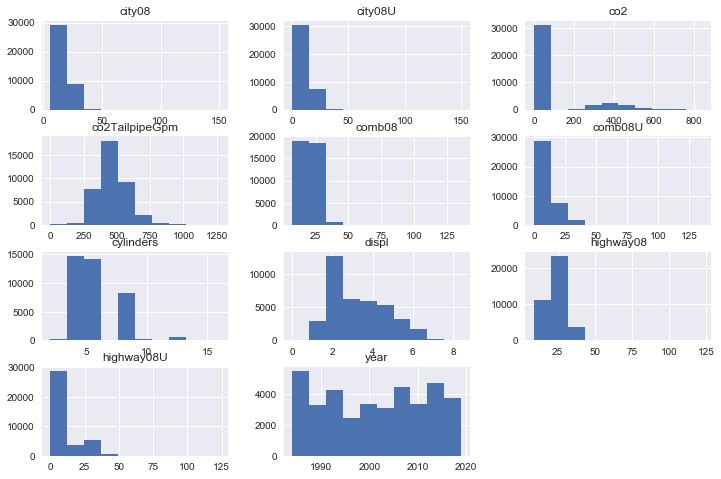

In [75]:
epa_subset.hist()

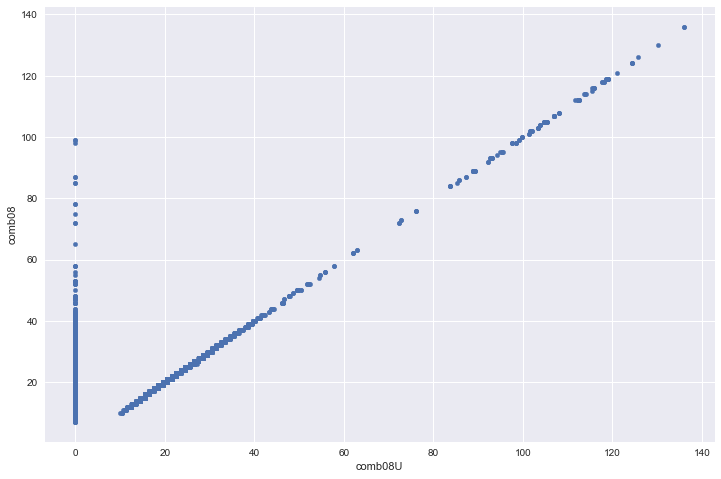

In [166]:
# difference between comb08U and comb08
epa_subset.plot.scatter(x="comb08U", y="comb08")

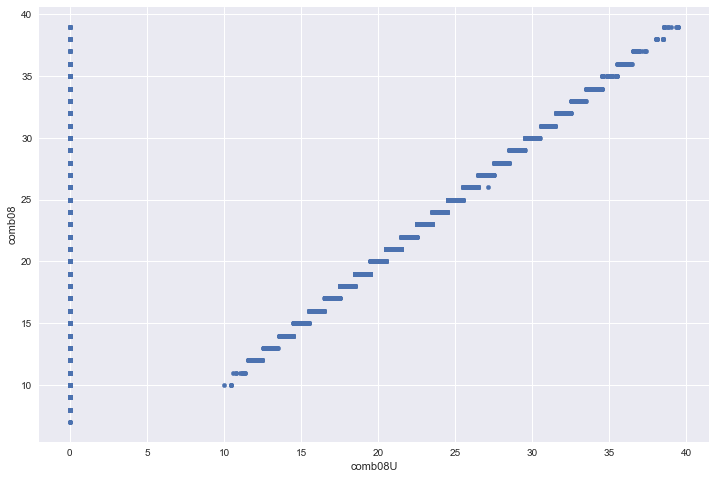

In [167]:
# rounding
epa_subset.query("comb08 > 0 and comb08 < 40").plot.scatter(x="comb08U", y="comb08")

In [199]:
# documentation indicates unrounded values not available for some vehicles
for column in ["city08", "city08U", "comb08", "comb08U", "highway08", "highway08U"]:
    non_zeros = epa_subset[epa_subset[column] > 0.01]
    display(column, len(non_zeros))

'city08'

38355

'city08U'

9703

'comb08'

38355

'comb08U'

9703

'highway08'

38355

'highway08U'

9703

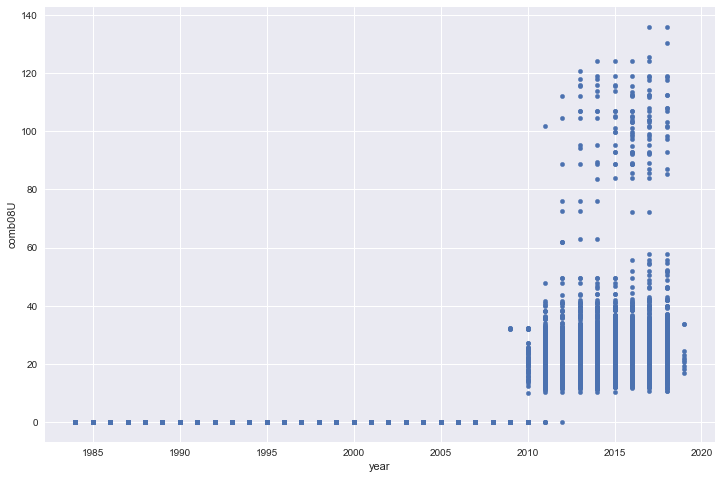

In [201]:
epa_subset.plot.scatter(x="year", y="comb08U")

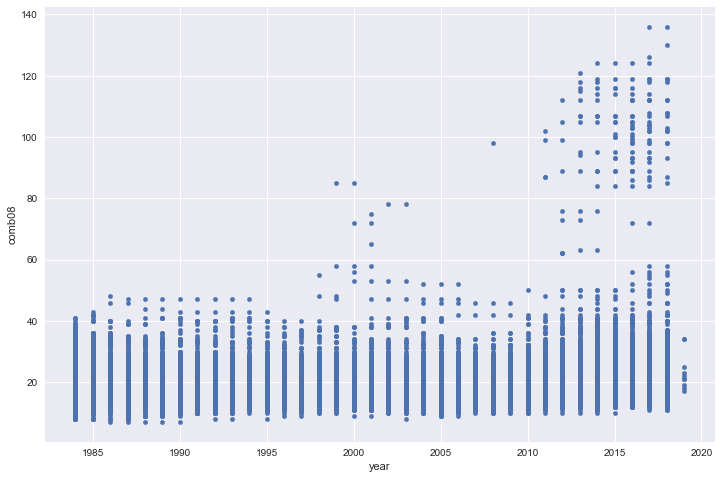

In [202]:
epa_subset.plot.scatter(x="year", y="comb08")

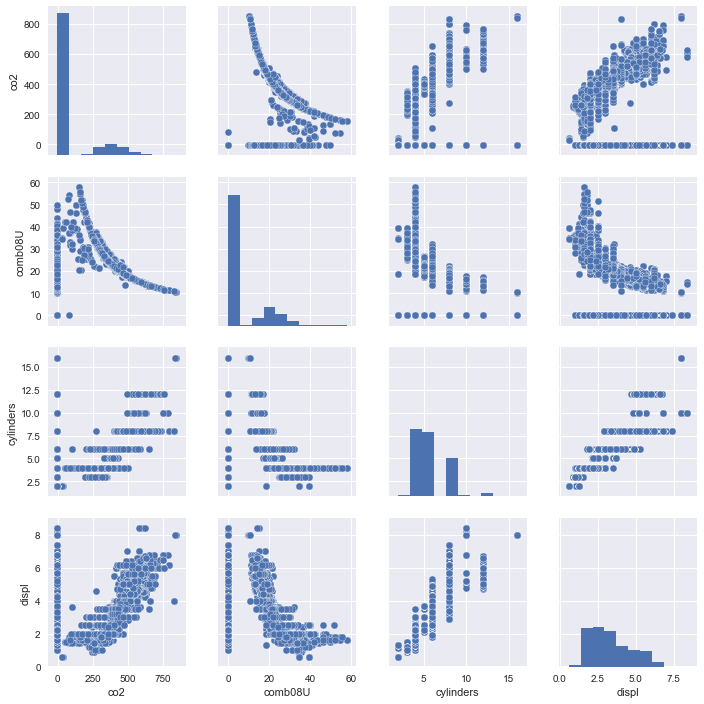

In [168]:
columns = [ "co2", "comb08U", "cylinders", "displ"]
sns.pairplot(epa_subset[columns].dropna())

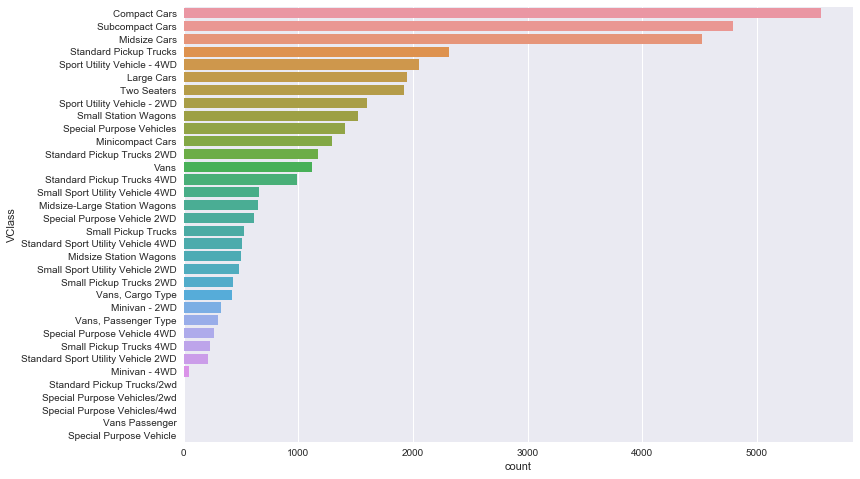

In [89]:
sns.countplot(y="VClass", data=epa_subset, order=epa_subset.VClass.value_counts().index)

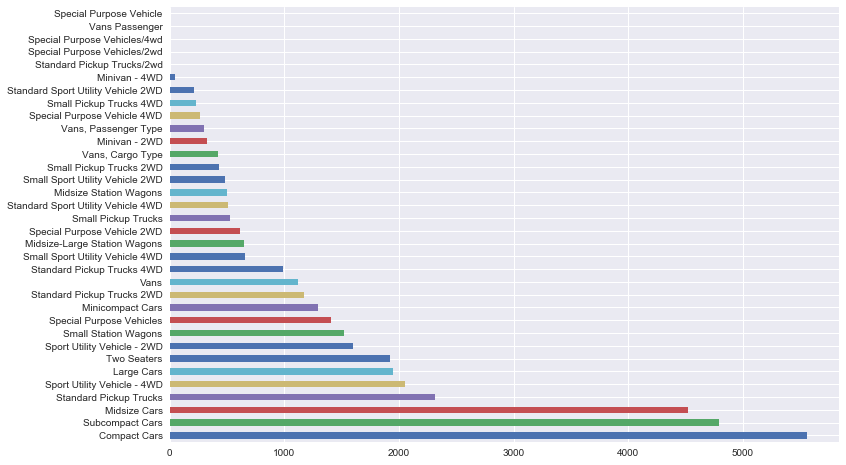

In [96]:
epa_subset.VClass.value_counts().plot(kind="barh")

In [114]:
top_classes = epa_subset.VClass.value_counts().index[:3]

In [169]:
epa_top_classes = epa_subset[epa_subset.VClass.isin(top_classes)]
epa_top_classes.head()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,trany,VClass,year
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
5,21,0.0,-1,403.954545,22,0.0,4.0,1.8,Regular Gasoline,24,0.0,Subaru,Loyale,Automatic 3-spd,Compact Cars,1993
6,22,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,29,0.0,Subaru,Loyale,Manual 5-spd,Compact Cars,1993
7,23,0.0,-1,370.291667,24,0.0,4.0,1.6,Regular Gasoline,26,0.0,Toyota,Corolla,Automatic 3-spd,Compact Cars,1993


In [170]:
# masking vs querying: https://pandas.pydata.org/pandas-docs/stable/indexing.html#performance-of-query
epa_top_classes = epa_subset.query("VClass in @top_classes")
epa_top_classes.head()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,trany,VClass,year
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
5,21,0.0,-1,403.954545,22,0.0,4.0,1.8,Regular Gasoline,24,0.0,Subaru,Loyale,Automatic 3-spd,Compact Cars,1993
6,22,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,29,0.0,Subaru,Loyale,Manual 5-spd,Compact Cars,1993
7,23,0.0,-1,370.291667,24,0.0,4.0,1.6,Regular Gasoline,26,0.0,Toyota,Corolla,Automatic 3-spd,Compact Cars,1993


In [171]:
%timeit epa_subset[epa_subset.VClass.isin(top_classes)]

2.75 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [172]:
%timeit epa_subset.query("VClass in @top_classes")

3.49 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


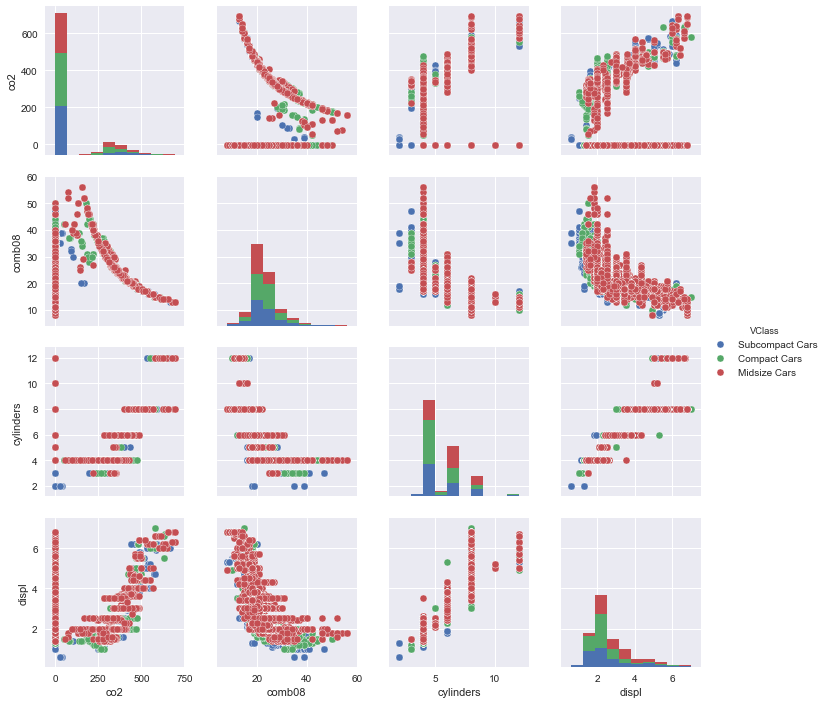

In [119]:
columns = [ "co2", "comb08", "cylinders", "displ", "VClass"]
sns.pairplot(epa_top_classes[columns].dropna(), hue="VClass")

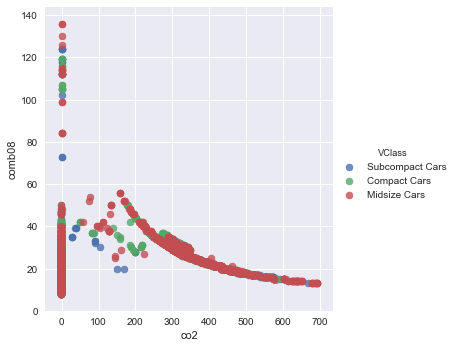

In [207]:
sns.lmplot(x='co2', y="comb08", hue='VClass', data=epa_top_classes, fit_reg=False)

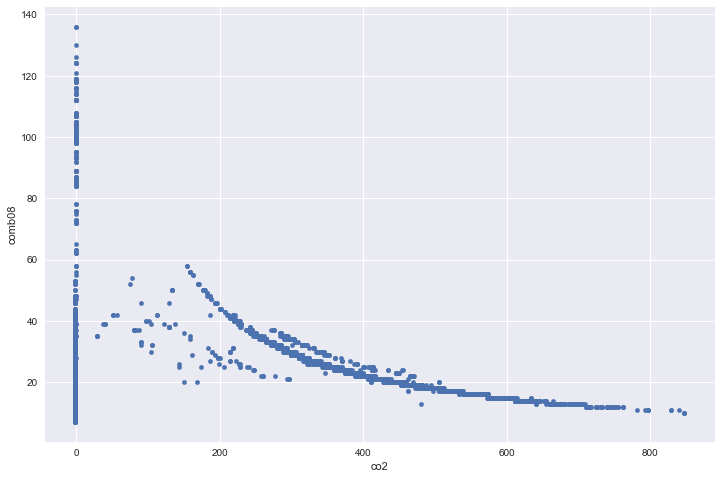

In [208]:
epa_subset.plot.scatter(x='co2', y='comb08')

In [210]:
# comparisons with zero
epa_subset.query("co2 < 0.01")

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,trany,VClass,year
0,19,0.0,-1,423.190476,21,0.0,4.0,2.0,Regular Gasoline,25,0.0,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,0.0,-1,807.909091,11,0.0,12.0,4.9,Regular Gasoline,14,0.0,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,0.0,-1,807.909091,11,0.0,8.0,5.2,Regular Gasoline,12,0.0,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
5,21,0.0,-1,403.954545,22,0.0,4.0,1.8,Regular Gasoline,24,0.0,Subaru,Loyale,Automatic 3-spd,Compact Cars,1993
6,22,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,29,0.0,Subaru,Loyale,Manual 5-spd,Compact Cars,1993
7,23,0.0,-1,370.291667,24,0.0,4.0,1.6,Regular Gasoline,26,0.0,Toyota,Corolla,Automatic 3-spd,Compact Cars,1993
8,23,0.0,-1,341.807692,26,0.0,4.0,1.6,Regular Gasoline,31,0.0,Toyota,Corolla,Manual 5-spd,Compact Cars,1993
9,23,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,30,0.0,Toyota,Corolla,Automatic 4-spd,Compact Cars,1993


In [211]:
epa_subset.query("co2 <= 0.01 and fuelType1 != 'Electricity'")

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,trany,VClass,year
0,19,0.0,-1,423.190476,21,0.0,4.0,2.0,Regular Gasoline,25,0.0,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,0.0,-1,807.909091,11,0.0,12.0,4.9,Regular Gasoline,14,0.0,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,0.0,-1,807.909091,11,0.0,8.0,5.2,Regular Gasoline,12,0.0,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
5,21,0.0,-1,403.954545,22,0.0,4.0,1.8,Regular Gasoline,24,0.0,Subaru,Loyale,Automatic 3-spd,Compact Cars,1993
6,22,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,29,0.0,Subaru,Loyale,Manual 5-spd,Compact Cars,1993
7,23,0.0,-1,370.291667,24,0.0,4.0,1.6,Regular Gasoline,26,0.0,Toyota,Corolla,Automatic 3-spd,Compact Cars,1993
8,23,0.0,-1,341.807692,26,0.0,4.0,1.6,Regular Gasoline,31,0.0,Toyota,Corolla,Manual 5-spd,Compact Cars,1993
9,23,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,30,0.0,Toyota,Corolla,Automatic 4-spd,Compact Cars,1993


In [212]:
# pure python approaach
epa_subset[(epa_subset['co2'] < 0.01) & (epa_subset['fuelType1'] != 'Electricity')]

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,trany,VClass,year
0,19,0.0,-1,423.190476,21,0.0,4.0,2.0,Regular Gasoline,25,0.0,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,Two Seaters,1985
1,9,0.0,-1,807.909091,11,0.0,12.0,4.9,Regular Gasoline,14,0.0,Ferrari,Testarossa,Manual 5-spd,Two Seaters,1985
2,23,0.0,-1,329.148148,27,0.0,4.0,2.2,Regular Gasoline,33,0.0,Dodge,Charger,Manual 5-spd,Subcompact Cars,1985
3,10,0.0,-1,807.909091,11,0.0,8.0,5.2,Regular Gasoline,12,0.0,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,Vans,1985
4,17,0.0,-1,467.736842,19,0.0,4.0,2.2,Premium Gasoline,23,0.0,Subaru,Legacy AWD Turbo,Manual 5-spd,Compact Cars,1993
5,21,0.0,-1,403.954545,22,0.0,4.0,1.8,Regular Gasoline,24,0.0,Subaru,Loyale,Automatic 3-spd,Compact Cars,1993
6,22,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,29,0.0,Subaru,Loyale,Manual 5-spd,Compact Cars,1993
7,23,0.0,-1,370.291667,24,0.0,4.0,1.6,Regular Gasoline,26,0.0,Toyota,Corolla,Automatic 3-spd,Compact Cars,1993
8,23,0.0,-1,341.807692,26,0.0,4.0,1.6,Regular Gasoline,31,0.0,Toyota,Corolla,Manual 5-spd,Compact Cars,1993
9,23,0.0,-1,355.480000,25,0.0,4.0,1.8,Regular Gasoline,30,0.0,Toyota,Corolla,Automatic 4-spd,Compact Cars,1993


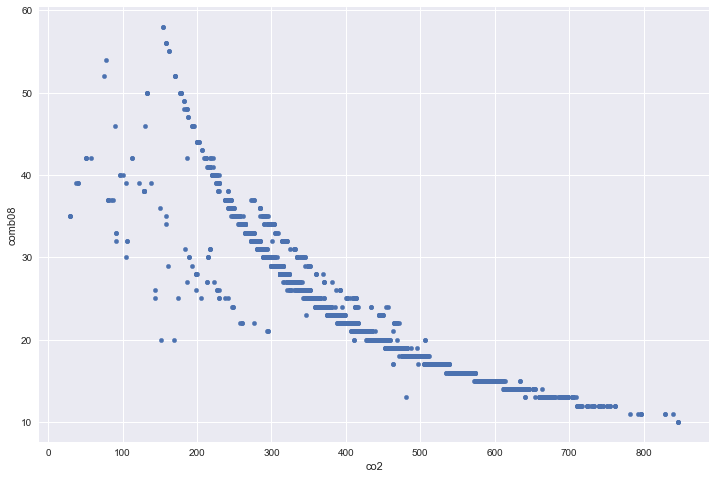

In [220]:
epa_subset.query("co2 >= 0.01").plot.scatter(x='co2', y='comb08')

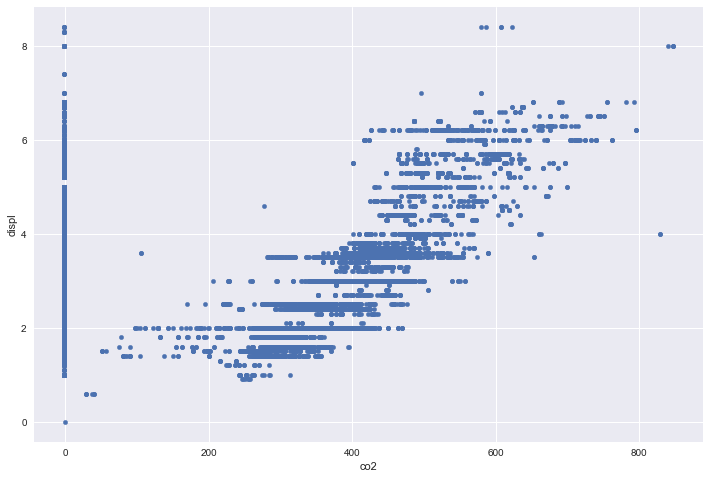

In [224]:
epa_subset.plot.scatter(x='co2', y='displ')

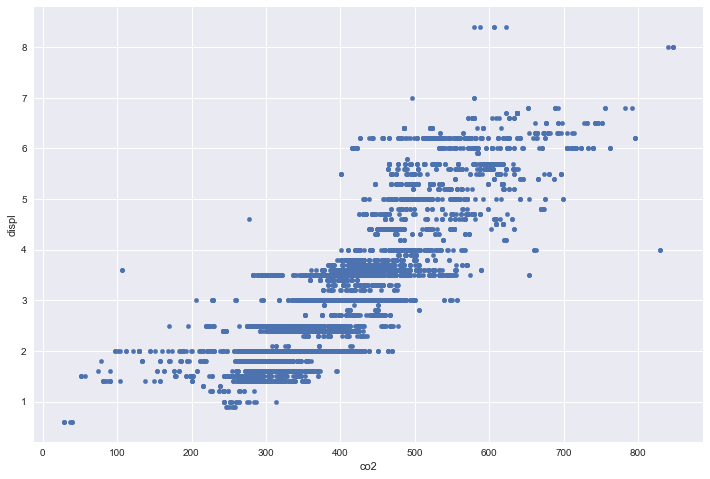

In [236]:
epa_nonzero_co2 = epa_subset.query("co2 > 0.01")
epa_nonzero_co2.plot.scatter(x='co2', y='displ')

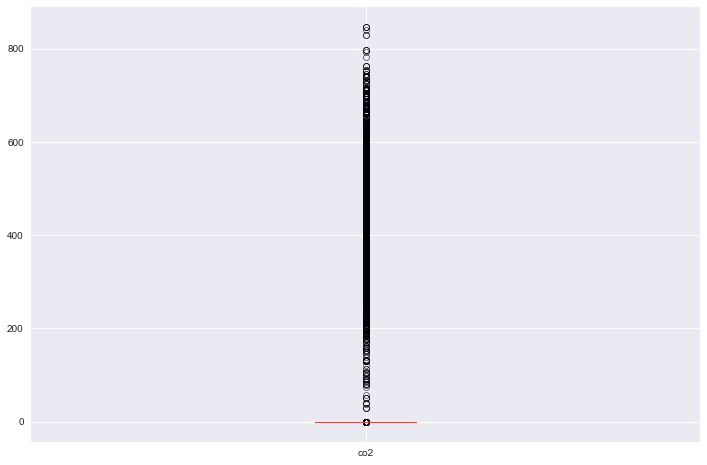

In [226]:
epa_subset.co2.plot(kind='box')

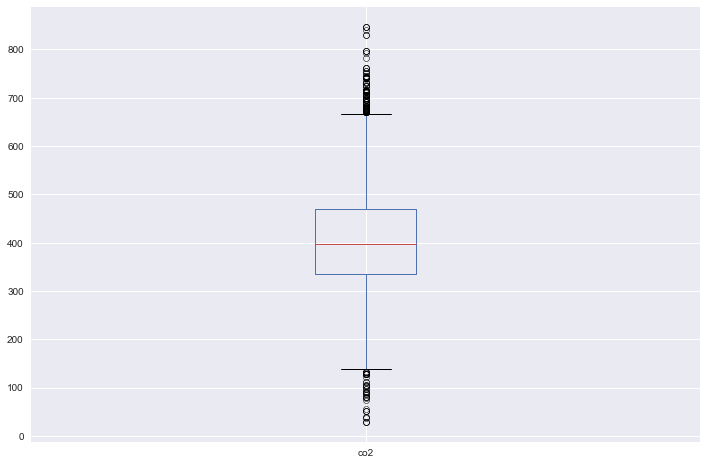

In [237]:
epa_nonzero_co2.co2.plot(kind='box')

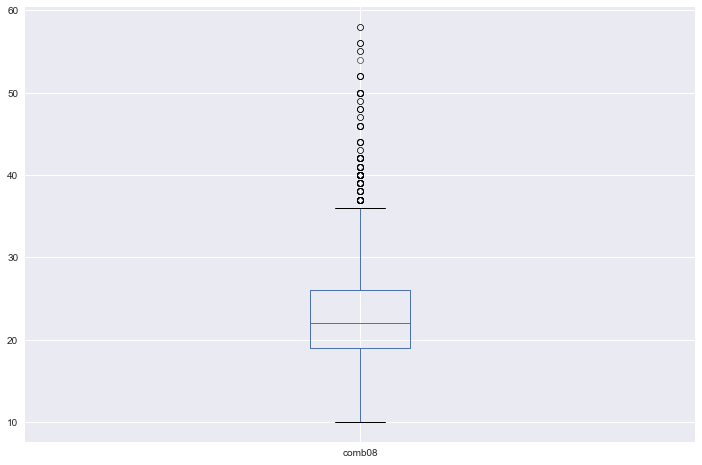

In [238]:
epa_nonzero_co2.comb08.plot(kind='box')

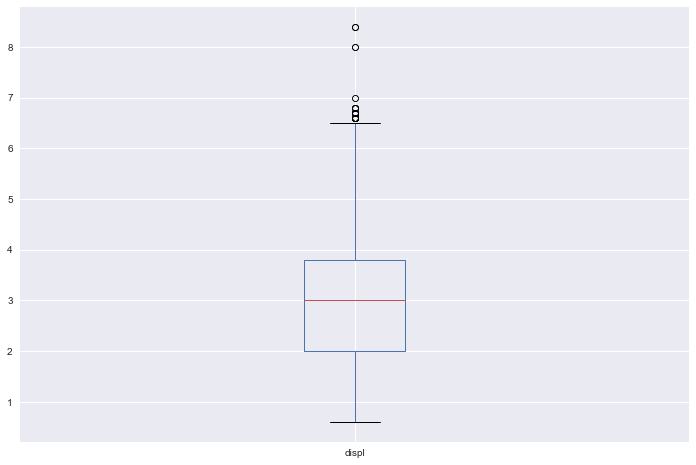

In [239]:
epa_nonzero_co2.displ.plot(kind='box')

In [246]:
q1 = epa_nonzero_co2.displ.quantile(0.25)
q3 = epa_nonzero_co2.displ.quantile(0.75)
displ_threshold = q3 + 1.5 * (q3 - q1)
display(q1, q3, displ_threshold)

2.0

3.8

6.5

In [241]:
epa_nonzero_co2[epa_nonzero_co2.displ > displ_threshold].describe()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,highway08,highway08U,year
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,11.522388,11.605087,641.074627,641.074627,13.970149,13.960790,11.373134,6.901493,18.761194,18.605612,2015.358209
std,1.283440,1.129977,71.744140,71.744140,1.403137,1.388596,1.881616,0.537811,2.030745,2.053855,1.702952
min,8.000000,8.423200,496.000000,496.000000,10.000000,10.442400,8.000000,6.600000,13.000000,13.375000,2013.000000
25%,11.000000,11.485000,583.500000,583.500000,14.000000,13.863400,10.000000,6.600000,18.000000,18.300800,2014.000000
50%,11.000000,11.488900,637.000000,637.000000,14.000000,13.867000,12.000000,6.700000,19.000000,18.575800,2015.000000
75%,12.000000,12.355250,638.000000,638.000000,15.000000,15.169850,12.000000,6.800000,19.000000,19.216000,2017.000000
max,15.000000,14.818200,847.000000,847.000000,18.000000,17.875900,16.000000,8.400000,24.000000,23.904700,2018.000000


In [244]:
q1 = epa_nonzero_co2.co2.quantile(0.25)
q3 = epa_nonzero_co2.co2.quantile(0.75)
co2_threshold = q3 + 1.5 * (q3 - q1)
display(q1, q3, co2_threshold)

336.0

469.0

668.5

In [247]:
epa_nonzero_co2.query("co2 > @co2_threshold and displ > @displ_threshold").describe()

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,highway08,highway08U,year
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,9.750000,9.767342,768.416667,768.416667,11.583333,11.629575,11.333333,7.200000,15.416667,15.291650,2014.416667
std,1.215431,0.952109,67.413862,67.413862,1.240112,1.033993,3.550501,0.590839,1.831955,1.769460,1.621354
min,8.000000,8.423200,688.000000,688.000000,10.000000,10.442400,8.000000,6.800000,13.000000,13.375000,2013.000000
25%,8.750000,8.697475,691.000000,691.000000,10.750000,10.554675,8.000000,6.800000,14.000000,13.879800,2013.000000
50%,10.000000,10.273850,768.500000,768.500000,11.500000,11.575800,10.000000,6.800000,15.000000,14.769800,2014.000000
75%,11.000000,10.540200,841.750000,841.750000,13.000000,12.838500,16.000000,8.000000,17.250000,17.376225,2015.000000
max,11.000000,10.591800,847.000000,847.000000,13.000000,12.888900,16.000000,8.000000,18.000000,17.712900,2018.000000


In [248]:
epa_nonzero_co2.query("co2 > @co2_threshold and displ > @displ_threshold")

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,fuelType1,highway08,highway08U,make,model,trany,VClass,year
24884,8,8.4232,847,847.0,10,10.4424,16.0,8.0,Premium Gasoline,15,14.7698,Bugatti,Veyron,Automatic (AM-S7),Two Seaters,2013
25448,11,10.5402,688,688.0,13,12.8889,8.0,6.8,Premium Gasoline,18,17.7129,Bentley,Mulsanne,Automatic (S8),Midsize Cars,2013
25508,10,10.4781,755,755.0,12,11.7769,10.0,6.8,Regular Gasoline,14,13.8798,Ford,E350 Van,Automatic 5-spd,"Vans, Cargo Type",2013
25513,10,10.0696,782,782.0,11,11.3747,10.0,6.8,Regular Gasoline,14,13.5158,Ford,E350 Wagon,Automatic 5-spd,"Vans, Passenger Type",2013
25947,8,8.4232,847,847.0,10,10.4424,16.0,8.0,Premium Gasoline,15,14.7698,Bugatti,Veyron,Automatic (AM-S7),Two Seaters,2014
26707,11,10.5402,688,688.0,13,12.8889,8.0,6.8,Premium Gasoline,18,17.7129,Bentley,Mulsanne,Automatic (S8),Midsize Cars,2014
26771,10,9.9114,792,792.0,11,11.2187,10.0,6.8,Regular Gasoline,13,13.3750,Ford,E350 Wagon,Automatic 5-spd,"Vans, Passenger Type",2014
26853,10,10.4781,755,755.0,12,11.7769,10.0,6.8,Regular Gasoline,14,13.8798,Ford,E350 Van,Automatic 5-spd,"Vans, Cargo Type",2014
27342,11,10.5402,688,688.0,13,12.8889,8.0,6.8,Premium Gasoline,18,17.7129,Bentley,Mulsanne,Automatic (S8),Midsize Cars,2015
27392,8,8.4232,847,847.0,10,10.4424,16.0,8.0,Premium Gasoline,15,14.7698,Bugatti,Veyron,Automatic (AM-S7),Two Seaters,2015


In [254]:
# pivot tables
epa_nonzero_comb = epa_subset.query("comb08 >= 0.01")
epa_nonzero_comb.pivot_table(index="year", aggfunc=pd.np.median)

,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,highway08,highway08U
year,,,,,,,,,,
1984,18.0,0.00000,-1.0,467.736842,19.0,0.00000,5.0,2.6,22.0,0.00000
1985,17.0,0.00000,-1.0,467.736842,19.0,0.00000,4.0,2.6,22.0,0.00000
1986,17.0,0.00000,-1.0,467.736842,19.0,0.00000,5.0,2.5,23.0,0.00000
1987,17.0,0.00000,-1.0,467.736842,19.0,0.00000,4.0,2.5,22.0,0.00000
1988,17.0,0.00000,-1.0,467.736842,19.0,0.00000,6.0,2.6,22.0,0.00000
1989,16.0,0.00000,-1.0,467.736842,19.0,0.00000,6.0,2.7,22.0,0.00000
1990,16.0,0.00000,-1.0,493.722222,18.0,0.00000,6.0,2.8,22.0,0.00000
1991,16.0,0.00000,-1.0,493.722222,18.0,0.00000,6.0,3.0,22.0,0.00000
1992,16.0,0.00000,-1.0,493.722222,18.0,0.00000,6.0,3.0,22.0,0.00000


In [256]:
epa_nonzero_comb.pivot_table(index="year", 
                             values=["city08", "comb08", "highway08"], 
                             aggfunc=pd.np.median)

,city08,comb08,highway08
year,,,
1984,18.0,19.0,22.0
1985,17.0,19.0,22.0
1986,17.0,19.0,23.0
1987,17.0,19.0,22.0
1988,17.0,19.0,22.0
1989,16.0,19.0,22.0
1990,16.0,18.0,22.0
1991,16.0,18.0,22.0
1992,16.0,18.0,22.0


In [258]:
epa_nonzero_comb.pivot_table(index="year", 
                             columns="fuelType1",
                             values=["city08", "comb08", "highway08"], aggfunc=pd.np.median)

city08                                                             \
fuelType1 Diesel Electricity Midgrade Gasoline Natural Gas Premium Gasoline   
year                                                                          
1984        21.0         NaN               NaN         NaN              NaN   
1985        21.0         NaN               NaN         NaN             17.0   
1986        21.0         NaN               NaN         NaN             17.0   
1987        17.0         NaN               NaN         NaN             17.0   
1988        16.0         NaN               NaN         NaN             16.0   
1989        16.0         NaN               NaN         NaN             16.0   
1990        15.0         NaN               NaN         NaN             15.0   
1991        15.0         NaN               NaN         NaN             15.0   
1992        16.0         NaN               NaN         NaN             15.0   
1993        16.0         NaN               NaN        15.0             15.5   
1994        15.0         NaN               NaN        15.0             16.0   
1995        14.0         NaN               NaN        15.0             15.0   
1996        15.0         NaN               NaN        15.0             16.0   
1997        14.0         NaN               NaN        15.0             16.0   
1998        25.0        49.0               NaN        10.0             16.0   
1999        29.0        49.0               NaN        13.0             16.0   
2000        32.0        71.5               NaN        14.0             16.0   
2001        32.0        74.0               NaN        11.0             16.0   
2002        32.0        66.0               NaN        12.0             16.0   
2003        29.0        87.0               NaN        11.5             16.0   
2004        28.0         NaN               NaN        11.0             16.0   
2005        29.0         NaN               NaN         8.0             16.0   
2006        30.0         NaN               NaN        24.0             16.0   
2007        18.0         NaN               NaN        24.0             17.0   
2008        18.0       102.0               NaN        24.0             16.0   
2009        23.0         NaN               NaN        24.0             17.0   
2010        29.0         NaN               NaN        24.0             17.0   
2011        26.0       100.0              16.0        17.5             17.0   
2012        29.0        78.0              14.0        19.0             18.0   
2013        27.0       116.0              15.0        27.0             18.0   
2014        27.0       122.0              15.0        19.5             18.0   
2015        27.5       105.5              14.0        27.0             19.0   
2016        23.0        98.0              14.5         NaN             19.0   
2017        23.0       102.0              16.0         NaN             19.0   
2018        28.0       121.0              16.0         NaN             20.0   
2019         NaN         NaN              18.5         NaN             15.0   

                           comb08                                            \
fuelType1 Regular Gasoline Diesel Electricity Midgrade Gasoline Natural Gas   
year                                                                          
1984                  17.0   24.0         NaN               NaN         NaN   
1985                  17.0   23.0         NaN               NaN         NaN   
1986                  17.0   22.0         NaN               NaN         NaN   
1987                  17.0   18.0         NaN               NaN         NaN   
1988                  17.0   17.0         NaN               NaN         NaN   
1989                  17.0   17.0         NaN               NaN         NaN   
1990                  17.0   17.0         NaN               NaN         NaN   
1991                  17.0   17.0         NaN               NaN         NaN   
1992                  17.0   18.0         NaN              

In [260]:
epa_nonzero_comb.pivot_table(index=["year", "fuelType1"],
                             values=["city08", "comb08", "highway08"], 
                             aggfunc=pd.np.median)

city08  comb08  highway08
year fuelType1                                   
1984 Diesel               21.0    24.0       27.5
     Regular Gasoline     17.0    19.0       22.0
1985 Diesel               21.0    23.0       27.0
     Premium Gasoline     17.0    19.0       22.0
     Regular Gasoline     17.0    19.0       22.0
1986 Diesel               21.0    22.0       24.0
     Premium Gasoline     17.0    19.0       22.0
     Regular Gasoline     17.0    19.0       23.0
1987 Diesel               17.0    18.0       21.0
     Premium Gasoline     17.0    19.0       22.0
     Regular Gasoline     17.0    19.0       23.0
1988 Diesel               16.0    17.0       20.0
     Premium Gasoline     16.0    18.0       23.0
     Regular Gasoline     17.0    19.0       22.0
1989 Diesel               16.0    17.0       20.0
     Premium Gasoline     16.0    18.0       22.0
     Regular Gasoline     17.0    19.0       22.0
1990 Diesel               15.0    17.0       20.0
     Premium Gasoline     15.0    18.0       22.0
     Regular Gasoline     17.0    19.0       22.0
1991 Diesel               15.0    17.0       20.0
     Premium Gasoline     15.0    18.0       22.0
     Regular Gasoline     17.0    18.0       22.0
1992 Diesel               16.0    18.0       22.0
     Premium Gasoline     15.0    18.0       22.0
     Regular Gasoline     17.0    19.0       23.0
1993 Diesel               16.0    17.0       20.0
     Natural Gas          15.0    17.0       21.0
     Premium Gasoline     15.5    18.0       22.0
     Regular Gasoline     17.0    19.0       23.0
...                        ...     ...        ...
2014 Diesel               27.0    30.5       37.5
     Electricity         122.0   107.0       97.0
     Midgrade Gasoline    15.0    17.0       22.0
     Natural Gas          19.5    22.0       27.0
     Premium Gasoline     18.0    21.0       26.0
     Regular Gasoline     20.0    23.0       28.0
2015 Diesel               27.5    32.0       38.5
     Electricity         105.5   103.0       98.5
     Midgrade Gasoline    14.0    17.0       22.0
     Natural Gas          27.0    31.0       38.0
     Premium Gasoline     19.0    22.0       26.0
     Regular Gasoline     20.0    23.0       28.0
2016 Diesel               23.0    25.5       30.0
     Electricity          98.0   100.0       99.0
     Midgrade Gasoline    14.5    17.0       22.0
     Premium Gasoline     19.0    22.0       26.0
     Regular Gasoline     21.0    24.0       28.0
2017 Diesel               23.0    25.0       30.0
     Electricity         102.0   103.5      101.0
     Midgrade Gasoline    16.0    19.0       24.0
     Premium Gasoline     19.0    22.0       27.0
     Regular Gasoline     21.0    24.0       28.0
2018 Diesel               28.0    32.0       38.5
     Electricity         121.0   107.5      100.0
     Midgrade Gasoline    16.0    19.0       24.0
     Premium Gasoline     20.0    22.0       27.0
     Regular Gasoline     21.0    23.0       28.0
2019 Midgrade Gasoline    18.5    21.5       26.5
     Premium Gasoline     15.0    18.0       25.0
     Regular Gasoline     30.0    34.0       40.0

[153 rows x 3 columns]

In [279]:
(epa_nonzero_comb.pivot_table(index=["VClass"],
                             values=["city08", "highway08"], 
                             aggfunc=pd.np.median)
                 .sort_values(by="highway08"))

,city08,highway08
VClass,,
Standard Pickup Trucks/2wd,12.0,15.5
"Vans, Passenger Type",12.0,16.5
Vans Passenger,13.0,17.0
Vans,14.0,17.0
Standard Pickup Trucks,14.0,17.0
"Vans, Cargo Type",13.0,17.0
Standard Pickup Trucks 4WD,14.0,18.0
Standard Pickup Trucks 2WD,15.0,19.0
Special Purpose Vehicles/4wd,15.5,19.0


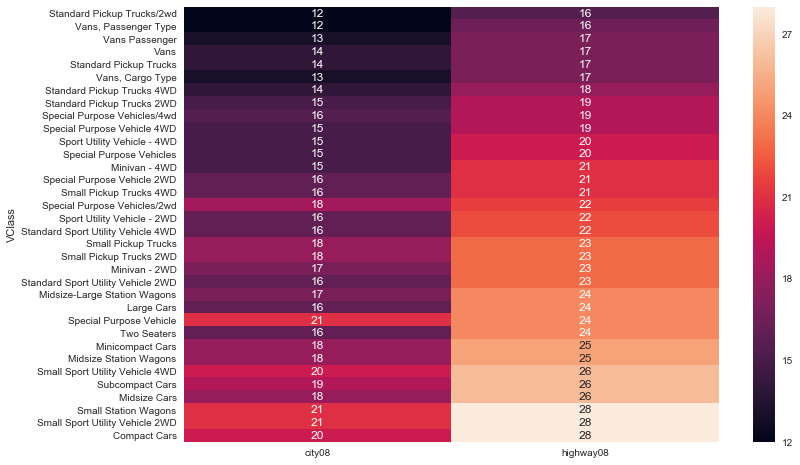

In [280]:
pivot = (epa_nonzero_comb.pivot_table(index=["VClass"],
                                      values=["city08", "highway08"], 
                                      aggfunc=pd.np.median)
                         .sort_values(by="highway08"))
sns.heatmap(pivot, annot=True)

In [305]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/output.sqlite')
epa_sales = pd.read_sql_table("epa_sales", con=engine)

In [306]:
epa_sales.head()

,index,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb,month,makemodel,quantity,pct
0,0,10.632581,0.0,0.0,0.0,29,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,286.677419,31,0.0,0,0.0,0.0,0.0,0.0,4.0,1.5,Front-Wheel Drive,0,None,-1,1250,0,Regular,Regular Gasoline,-1,-1,35,0.0,0,0.0,0.0,0.0,0.0,13,85,22749,0,14,toyota,yaris,Y,False,0,87,0,0.0,0.0,0.0,0.0,Automatic 4-spd,37.6644,0.0,49.649,0.0,Subcompact Cars,2007,1000,NaN,CLKUP,None,NaN,None,NaN,NaN,None,None,None,0.0,None,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,None,0,0,0,1,Toyota Yaris,402,3.2
1,1,10.632581,0.0,0.0,0.0,29,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,286.677419,31,0.0,0,0.0,0.0,0.0,0.0,4.0,1.5,Front-Wheel Drive,0,None,-1,1250,0,Regular,Regular Gasoline,-1,-1,35,0.0,0,0.0,0.0,0.0,0.0,13,85,22749,0,14,toyota,yaris,Y,False,0,87,0,0.0,0.0,0.0,0.0,Automatic 4-spd,37.6644,0.0,49.649,0.0,Subcompact Cars,2007,1000,NaN,CLKUP,None,NaN,None,NaN,NaN,None,None,None,0.0,None,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,None,0,0,0,2,Toyota Yaris,353,3.6
2,2,10.632581,0.0,0.0,0.0,29,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,286.677419,31,0.0,0,0.0,0.0,0.0,0.0,4.0,1.5,Front-Wheel Drive,0,None,-1,1250,0,Regular,Regular Gasoline,-1,-1,35,0.0,0,0.0,0.0,0.0,0.0,13,85,22749,0,14,toyota,yaris,Y,False,0,87,0,0.0,0.0,0.0,0.0,Automatic 4-spd,37.6644,0.0,49.649,0.0,Subcompact Cars,2007,1000,NaN,CLKUP,None,NaN,None,NaN,NaN,None,None,None,0.0,None,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,None,0,0,0,3,Toyota Yaris,267,2.4
3,3,10.632581,0.0,0.0,0.0,29,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,286.677419,31,0.0,0,0.0,0.0,0.0,0.0,4.0,1.5,Front-Wheel Drive,0,None,-1,1250,0,Regular,Regular Gasoline,-1,-1,35,0.0,0,0.0,0.0,0.0,0.0,13,85,22749,0,14,toyota,yaris,Y,False,0,87,0,0.0,0.0,0.0,0.0,Automatic 4-spd,37.6644,0.0,49.649,0.0,Subcompact Cars,2007,1000,NaN,CLKUP,None,NaN,None,NaN,NaN,None,None,None,0.0,None,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,None,0,0,0,4,Toyota Yaris,198,2.2
4,4,10.632581,0.0,0.0,0.0,29,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,286.677419,31,0.0,0,0.0,0.0,0.0,0.0,4.0,1.5,Front-Wheel Drive,0,None,-1,1250,0,Regular,Regular Gasoline,-1,-1,35,0.0,0,0.0,0.0,0.0,0.0,13,85,22749,0,14,toyota,yaris,Y,False,0,87,0,0.0,0.0,0.0,0.0,Automatic 4-spd,37.6644,0.0,49.649,0.0,Subcompact Cars,2007,1000,NaN,CLKUP,None,NaN,None,NaN,NaN,None,None,None,0.0,None,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,None,0,0,0,5,Toyota Yaris,270,2.2


In [307]:
epa_sales.describe()

,index,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,engId,feScore,fuelCost08,fuelCostA08,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,guzzler,sCharger,fuelType2,rangeA,charge240b,phevCity,phevHwy,phevComb,month,quantity,pct
count,1562.000000,1562.000000,1562.0,1562.0,1562.000000,1562.000000,1562.000000,1562.0,1562.0,1562.0,1562.000000,1562.0,1562.000000,1562.0,1562.0,1562.000000,1562.000000,1562.000000,1562.0,1562.0,1562.000000,1562.0,1562.0,1512.000000,1512.000000,1562.000000,1562.000000,1562.000000,1562.0,1562.000000,1562.0,1562.000000,1562.000000,1562.0,1562.0,1562.0,1562.000000,1562.0,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.0,1562.000000,1562.0,1562.000000,1562.0,1562.000000,1562.0,1562.000000,1562.000000,0.0,0.0,0.0,0.0,1562.000000,1562.0,1562.0,1562.0,1562.000000,1562.000000,1562.000000
mean,780.500000,12.112483,0.0,0.0,0.238796,28.013444,19.313297,0.0,0.0,0.0,0.895684,0.0,151.313700,-1.0,0.0,325.575910,30.473111,20.888515,0.0,0.0,0.983008,0.0,0.0,4.294974,2.104894,65.350192,2.709347,1546.318822,0.0,2.631242,-1.0,34.879001,23.755406,0.0,0.0,0.0,1.091800,0.0,7.290013,40.483355,30406.505122,0.483995,8.281690,2.625480,53.166453,2.542894,2.710615,0.0,2.218945,0.0,36.521442,0.0,49.808192,0.0,2011.604994,-481.594110,NaN,NaN,NaN,NaN,0.107554,0.0,0.0,0.0,6.515365,359.620999,3.160930
std,451.054875,2.924709,0.0,0.0,1.317095,18.153533,21.255202,0.0,0.0,0.0,4.945872,0.0,164.013207,0.0,0.0,79.673527,15.614908,20.341125,0.0,0.0,5.419013,0.0,0.0,0.619794,0.516443,154.703646,4.214617,383.981246,0.0,4.117399,0.0,12.714127,20.418295,0.0,0.0,0.0,6.013691,0.0,8.439392,45.203774,4564.910212,2.856609,7.474152,15.252517,47.044629,14.034588,15.128249,0.0,12.367836,0.0,26.777019,0.0,18.846797,0.0,2.935052,1919.906229,NaN,NaN,NaN,NaN,0.704125,0.0,0.0,0.0,3.467995,279.456021,2.229873
min,0.000000,0.174000,0.0,0.0,0.000000,17.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,-1.000000,-1.0,0.0,0.000000,20.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,4.000000,1.500000,0.000000,-1.000000,550.000000,0.0,-1.000000,-1.0,24.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,22749.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,21.167500,0.0,34.100000,0.0,2007.000000,-4250.000000,NaN,NaN,NaN,NaN,0.000000,0.0,0.0,0.0,1.000000,13.000000,0.100000
25%,390.250000,11.240735,0.0,0.0,0.000000,21.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,-1.000000,-1.0,0.0,292.000000,24.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,4.000000,1.800000,0.000000,-1.000000,1350.000000,0.0,-1.000000,-1.0,29.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,25343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,26.025200,0.0,40.400300,0.0,2009.000000,-2250.000000,NaN,NaN,NaN,NaN,0.000000,0.0,0.0,0.0,4.000000,188.000000,1.700000
50%,780.500000,12.677308,0.0,0.0,0.000000,24.000000,21.990400,0.0,0.0,0.0,0.000000,0.0,0.000000,-1.0,0.0,334.000000,26.000000,25.281500,0.0,0.0,0.000000,0.0,0.0,4.000000,2.000000,34.000000,-1.000000,1500.000000,0.0,-1.000000,-1.0,33.000000,30.026000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,31602.000000,0.000000,13.000000,0.000000,87.000000,0.000000,0.000000,0.0,0.000000,0.0,29.605500,0.0,44.508800,0.0,2012.000000,-250.000000,NaN,NaN,NaN,NaN,0.000000,0.0,0.0,0.0,7.000000,273.000000,2.400000
75%,1170.750000,13.733750,0.0,0.0,0.000000,29.000000,28.500000,0.0,0.0,0.0,0.000000,0.0,317.000000,-1.0,0.0,370.291667,32.000000,31.849800,0.0,0.0,0.000000,0.0,0.0,4.000000,2.300000,76.000000,7.000000,1900.000000,0.0,7.000000,-1.0,36.000000,35.058600,0.0,0.0,0.0,0.000000,0.0,15.000000,93.000000,33948.000000,0.000000,15.0

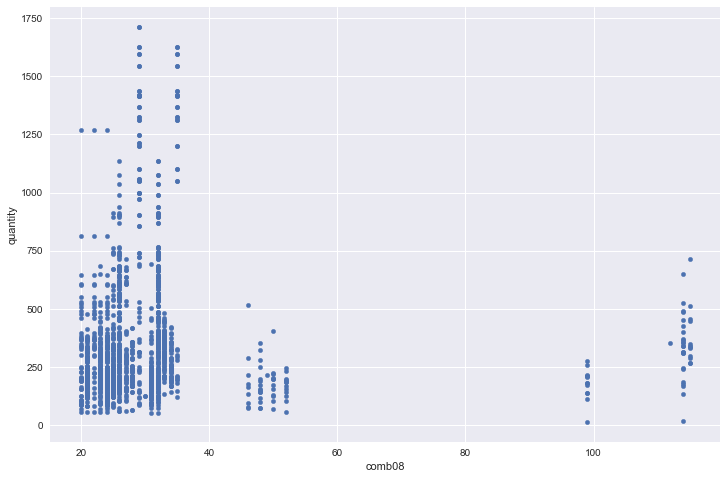

In [311]:
epa_sales.plot.scatter(x="comb08", y="quantity")

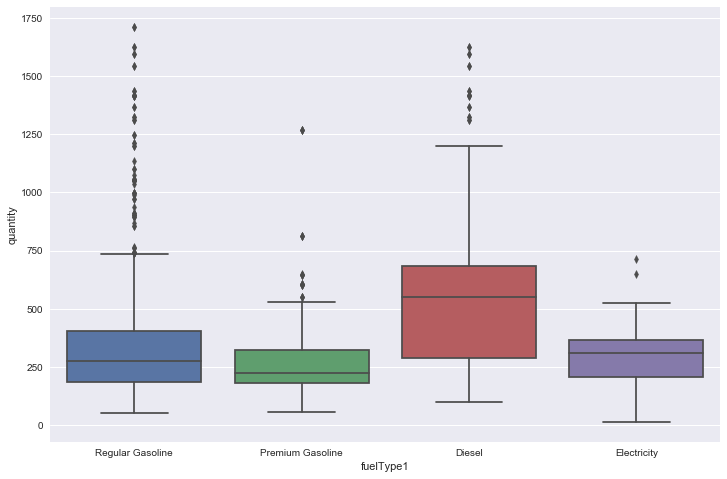

In [313]:
sns.boxplot(x="fuelType1", y="quantity", data=epa_sales)

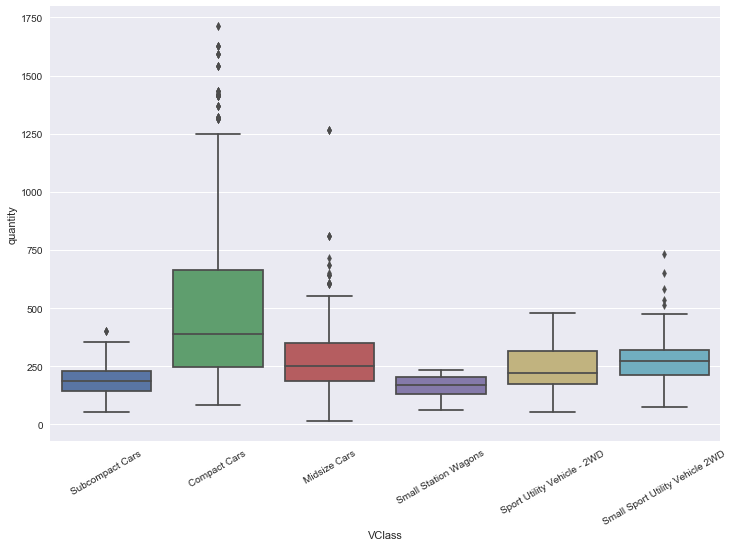

In [319]:
b = sns.boxplot(x="VClass", y="quantity", data=epa_sales)
for item in b.get_xticklabels():
    item.set_rotation(30)